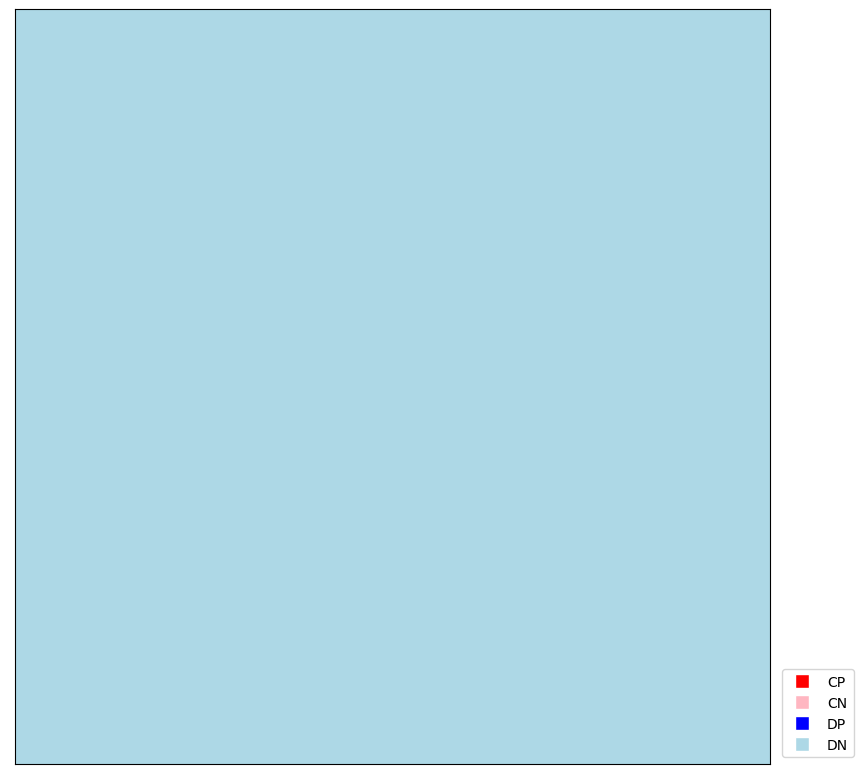

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch

# 从csv文件中读取数据
dat = pd.read_csv('F:/大学院/研究/新しいデータ/animation/indirect r=0.2 delta=0.11 beta=0.20 animation.csv', header=None)
# 定义每组数据的大小
group_size = (100, 100)
# 计算共有多少组数据
num_groups = dat.shape[0] // group_size[0]
# 创建自定义颜色映射，0为红色（CP），1为浅粉色（CN），2为蓝色（DP），3为浅蓝色（DN）
colors = ['red','lightpink','blue', 'lightblue']
cmap = ListedColormap(colors)
# 每1步为一帧输出
total_steps = num_groups  # 总的步数，每组数据为一步
# 设置分辨率
dpi = 100
# 创建图形对象
fig, ax = plt.subplots(figsize=(10, 10), dpi=dpi)
# 创建一个函数，用于更新图像
def update(frame):
    group_index = frame
    # 计算当前组数据的起始行和列索引
    start_row = group_index * group_size[0]
    start_col = 0
    # 取出当前组数据，并reshape为二维数组
    group_data = dat.iloc[start_row:start_row + group_size[0], start_col:start_col + group_size[1]].values
    # 设置坐标轴的限制
    ax.set_xlim(0, group_size[1])
    ax.set_ylim(0, group_size[0])
    # 创建一个新的二维数组，将0映射为0.0，1映射为1.0，2映射为2.0，其他值映射为nan
    mapped_data = np.full_like(group_data, np.nan, dtype=float)
    mapped_data[group_data == 1] = 0.0
    mapped_data[group_data == 2] = 1.0
    mapped_data[group_data == 3] = 2.0
    mapped_data[group_data == 4] = 3.0
    # 清空图像
    ax.clear()
    # 绘制图像
    im = ax.imshow(mapped_data, cmap=cmap, vmin=0, vmax=4)  # 显式设置颜色映射的范围
    # 调整标题的字体大小和距离图像的距离
    #ax.set_title(f'Time step = {frame}', fontsize=24, pad=20)  # 增大字体大小并增加距离
    # 去除底轴和左轴刻度及标签
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # 创建图例
    legend_labels = ['CP', 'CN', 'DP', 'DN']
    legend_colors = ['red', 'lightpink', 'blue', 'lightblue']
    legend_patches = [plt.Line2D([0], [0], marker='s', color='white', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
    
    # 添加图例
    leg = ax.legend(handles=legend_patches, loc='lower right', bbox_to_anchor=(1.12, 0))
    # 将图例的文字颜色设为白色，以适应暗色背景
    for text in leg.get_texts():
        text.set_color("black")

# 创建动画对象，设置interval参数控制帧之间的时间间隔
# 尝试不同的interval值以获得所需的速度
ani = FuncAnimation(fig, update, frames=total_steps, repeat=False, interval=10)  # 设置interval为100毫秒
# 保存动画为视频
# 设置fps参数来控制帧速率，这里设置为10帧每秒
ani.save('510 indirect r=0.2 delta=0.11 beta=0.20_color.mp4', writer='ffmpeg', dpi=dpi, fps=8, extra_args=['-vcodec', 'libx264'])  # 设置fps为10
# 展示动画
plt.show()
